In [ ]:
# https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a
#

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
# data generation
mod1 = lambda t:np.random.normal(10,3,t)

In [ ]:
# population of 30.000 individual avg 10, scale=3
population = mod1(30000)

In [ ]:
# Assume only able to obs 1.000 of these individuals
observation = population[np.random.randint(0, 30000, 1000)]

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: 1000 obs from 30.000")
mu_obs = observation.mean()
mu_obs

In [86]:
# transition model defines how to move from sigma current to sigma new
transition_model = lambda x: [x[0], np.random.normal(x[1], 0.5, (1,))[0]]

In [90]:
np.random.normal(0.1, 0.5, (1,))

array([-1.47754621])

In [ ]:
def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <= 0): return 0
    return 1

In [ ]:
#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x, data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))


In [ ]:
#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x, data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0], x[1]).pdf(data)))

In [ ]:
# accept or reject new sample
def acceptance (x, x_new):
    if x_new > x: return True
    else:
        accept = np.random.uniform(0, 1)
        return (accept < (np.exp(x_new - x)))

In [ ]:
def metropolis_hastings(likelihood_computer, 
                        prior, 
                        transition_model, 
                        param_init,
                        iterations,
                        data,
                        acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample    
    x = param_init
    accepted = []
    rejected = []
    for i in range(iterations):
        x_new = transition_model(x)
        x_lik = likelihood_computer(x, data)
        x_new_lik = likelihood_computer(x_new, data)
        if(acceptance_rule(x_lik + 
                           np.log(prior(x)), 
                           x_new_lik + np.log(prior(x_new)))):
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
    return np.array(accepted), np.array(rejected)

In [87]:
accepted, rejected = metropolis_hastings( manual_log_like_normal,
                                        prior,
                                        transition_model,
                                        [mu_obs, 0.1],
                                        50000,
                                        observation,
                                        acceptance)

In [88]:
len(accepted)

8333

In [ ]:
mu_obs

In [89]:
accepted

array([[9.87624679, 0.87360928],
       [9.87624679, 1.15183328],
       [9.87624679, 1.20810564],
       ...,
       [9.87624679, 3.18035165],
       [9.87624679, 2.97210377],
       [9.87624679, 3.02104666]])

In [ ]:
a = accepted[:, 1]
r = rejected[:, 1]

In [ ]:
start = 1000
num = 8000
plt.plot(np.linspace(start,num,num-start), r[start:num] )
#plt.scatter(np.linspace(start,num,num-start), a[start:num])


In [ ]:
plt.hist(a[start:num], bins=35)

In [96]:
post = [x + y for x in accepted[:,0] and y in accepted[:,1]]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [97]:
post = list(map(lambda x: x[0] + x[1], accepted))

In [98]:
post

[10.749856067144425,
 11.028080064299,
 11.084352428473483,
 11.227156164874188,
 11.239139142849396,
 11.657923431064853,
 11.863869944503367,
 12.083761135079444,
 12.245904697525285,
 13.26776167470953,
 13.101731660687076,
 12.773616832632415,
 12.870504142380573,
 12.825972988269045,
 12.939340413739844,
 12.899769863830072,
 12.924386101791708,
 12.957151421368366,
 12.9449495601017,
 12.776771994813117,
 12.775721870456714,
 12.801357843842016,
 12.822092055695958,
 12.87338238970497,
 12.939674201547259,
 12.917050133648624,
 12.934017734102891,
 12.819842914406804,
 12.764697944562409,
 12.778895748330172,
 12.948271162392238,
 12.821890810604454,
 12.839999536647658,
 12.799329641617025,
 12.940746632392194,
 12.805204787350009,
 12.837499053261688,
 12.820611388124139,
 12.82867017269601,
 12.825633064043991,
 12.993085521156413,
 12.771119895375083,
 12.741561058018066,
 12.959495537521114,
 12.824232165710665,
 12.884099250033628,
 12.936435168951984,
 12.968015263898575,


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+01, 4.560e+02, 1.968e+03, 2.761e+03,
        2.211e+03, 7.950e+02, 1.060e+02, 6.000e+00, 1.000e+00]),
 array([10.74985607, 10.82179623, 10.89373639, 10.96567655, 11.03761671,
        11.10955687, 11.18149703, 11.25343719, 11.32537735, 11.39731751,
        11.46925767, 11.54119783, 11.61313799, 11.68507815, 11.75701831,
        11.82895847, 11.90089863, 11.97283879, 12.04477895, 12.11671911,
        12.18865927, 12.26059943, 12.33253959, 12.40447975, 12.47641991,
        12.54836007, 12.62030023, 12.69224039, 12.76418055, 12.83612071,
        12.90806087, 12.98000103, 13.05194119, 13.12388135, 13.19582151,
        13.26776167]),
 <BarContainer object of 35 art

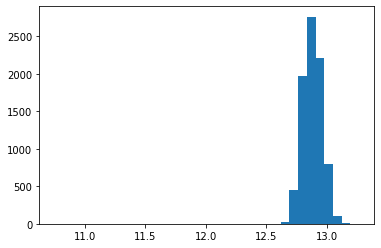

In [99]:
plt.hist(post, bins=35)